In [ ]:
import pandas as pd
import psycopg2

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="your_database_name",
    user="user_name",
    password="your_password"
)

# Write your SQL query
query = """
SELECT 
    DATE_PART('year', "Order Date") AS year,
    DATE_PART('month', "Order Date") AS month,
    ROUND(SUM("Sales")::numeric, 2) AS sales,
    ROUND(SUM("Profit")::numeric, 2) AS profit
FROM orders_staging
GROUP BY year, month
ORDER BY year, month;
"""

# Run query and load results into a DataFrame
df = pd.read_sql(query, conn)

# Save to CSV
df.to_csv(r"C:\Users\ochie\OneDrive\Desktop\D_Docs\superstore_performance_analysis\data\monthly_sales_profit.csv", index=False)

# Close connection
conn.close()

print("✅ Data exported successfully!")


✅ Data exported successfully!


C:\Users\ochie\AppData\Local\Temp\ipykernel_16716\2352929703.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv(r"C:\Users\ochie\OneDrive\Desktop\D_Docs\superstore_performance_analysis\data\monthly_sales_profit.csv", encoding="ISO-8859-1")

# Convert year and month to integers
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)

# Combine year and month into a single datetime column
data['Date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

# Sort by date
data = data.sort_values('Date')

data.head()


,year,month,sales,profit,Date
0,2014,1,14236.90,2450.19,2014-01-01
1,2014,2,4519.89,862.31,2014-02-01
2,2014,3,55691.01,498.73,2014-03-01
3,2014,4,28295.35,3488.84,2014-04-01
4,2014,5,23648.29,2738.71,2014-05-01


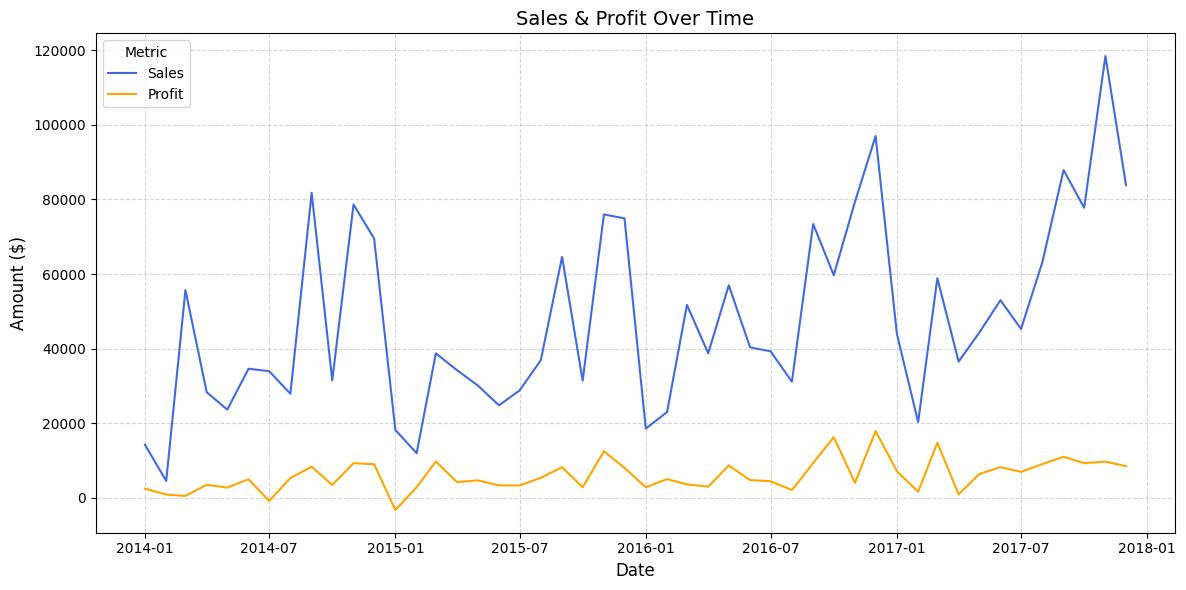

In [ ]:
#sales and profit over time
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='sales', label='Sales', color='royalblue')
sns.lineplot(data=data, x='Date', y='profit', label='Profit', color='orange')

plt.title("Sales & Profit Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Amount ($)", fontsize=12)
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


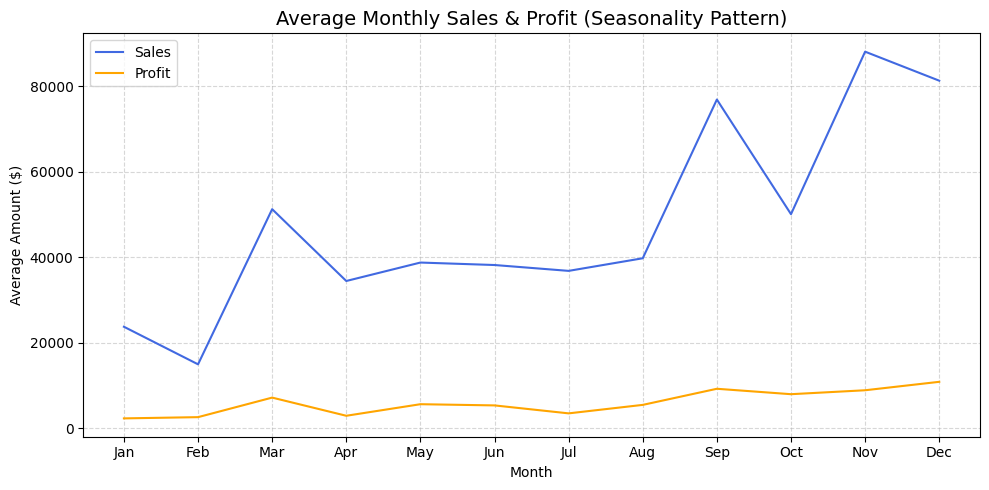

In [8]:
# Add month names for readability
data['Month'] = data['Date'].dt.strftime('%b')

# Aggregate across years to find average monthly trend
seasonality = data.groupby('Month')[['sales', 'profit']].mean().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=seasonality, x='Month', y='sales', label='Sales', color='royalblue')
sns.lineplot(data=seasonality, x='Month', y='profit', label='Profit', color='orange')

plt.title("Average Monthly Sales & Profit (Seasonality Pattern)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Amount ($)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
